In [ ]:
#pip install scikit-learn tensorflow tsfresh pycaret

In [ ]:
#pip install --upgrade scipy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/combined_data_final.csv")

In [ ]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


In [ ]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [ ]:
data.shape

(1552210, 41)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1398811 non-null  float64
 1   O2Sat             1349474 non-null  float64
 2   Temp              525226 non-null   float64
 3   SBP               1325945 non-null  float64
 4   MAP               1358940 non-null  float64
 5   DBP               1065656 non-null  float64
 6   Resp              1313875 non-null  float64
 7   EtCO2             57636 non-null    float64
 8   BaseExcess        84145 non-null    float64
 9   HCO3              65028 non-null    float64
 10  FiO2              129365 non-null   float64
 11  pH                107573 non-null   float64
 12  PaCO2             86301 non-null    float64
 13  SaO2              53561 non-null    float64
 14  AST               25183 non-null    float64
 15  BUN               106568 non-null   float64
 16  

In [ ]:
data.isnull().sum()

,0
HR,153399
O2Sat,202736
Temp,1026984
SBP,226265
MAP,193270
DBP,486554
Resp,238335
EtCO2,1494574
BaseExcess,1468065
HCO3,1487182


In [ ]:
missing_data = data.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_data)

# Keep columns with missing values below a certain threshold (e.g., < 95%)
threshold = 0.95
data_revised = data.loc[:, missing_data < threshold]

# Check remaining columns after filtering
print("Columns retained after filtering:\n", data_revised.columns)


Percentage of missing values in each column:
 HR                   9.882619
O2Sat               13.061119
Temp                66.162697
SBP                 14.576958
MAP                 12.451279
DBP                 31.345887
Resp                15.354559
EtCO2               96.286843
BaseExcess          94.579020
HCO3                95.810618
FiO2                91.665754
pH                  93.069688
PaCO2               94.440121
SaO2                96.549372
AST                 98.377604
BUN                 93.134434
Alkalinephos        98.393194
Calcium             94.116067
Chloride            95.460279
Creatinine          93.904433
Bilirubin_direct    99.807371
Glucose             82.894325
Lactate             97.329872
Magnesium           93.689578
Phosphate           95.986303
Potassium           90.689082
Bilirubin_total     98.509158
TroponinI           99.047745
Hct                 91.145979
Hgb                 92.617558
PTT                 97.055875
WBC                 93.5

Data Cleaning

In [ ]:
# 1. Remove unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
import missingno as msno

In [ ]:
#msno.matrix(data)

In [ ]:
#msno.heatmap(data)

<Axes: >

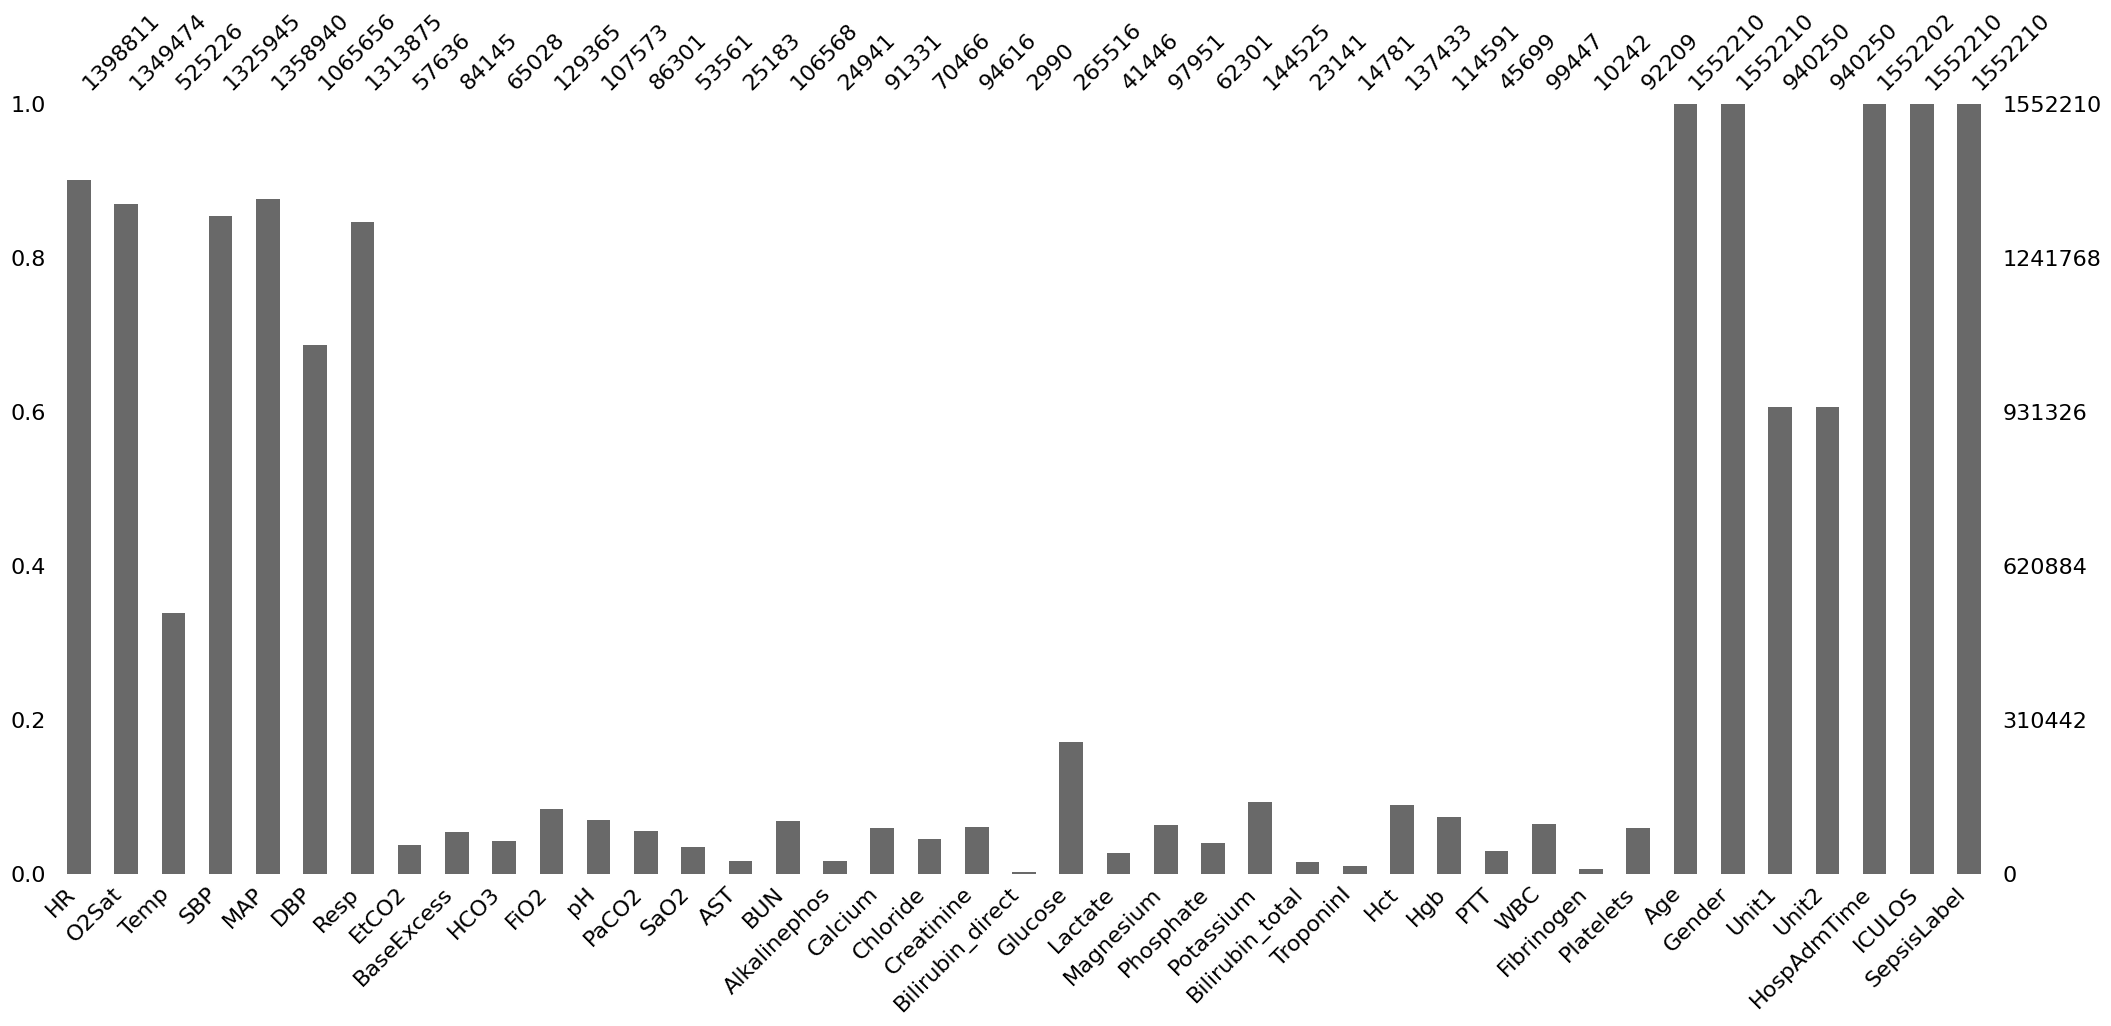

In [ ]:
msno.bar(data)

In [ ]:
#msno.dendrogram(data)

In [ ]:
# Forward Fill and Backward Fill for time-series data
# Suitable for columns like 'HR', 'O2Sat', 'Resp', etc.
time_series_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp']
data[time_series_cols] = data[time_series_cols].fillna(method='ffill').fillna(method='bfill')


<ipython-input-15-4ce582182456>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[time_series_cols] = data[time_series_cols].fillna(method='ffill').fillna(method='bfill')


In [ ]:
#  Mean/Median Imputation for numerical columns
# This will replace NaNs with the column mean or median, as appropriate
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
print(numerical_cols)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


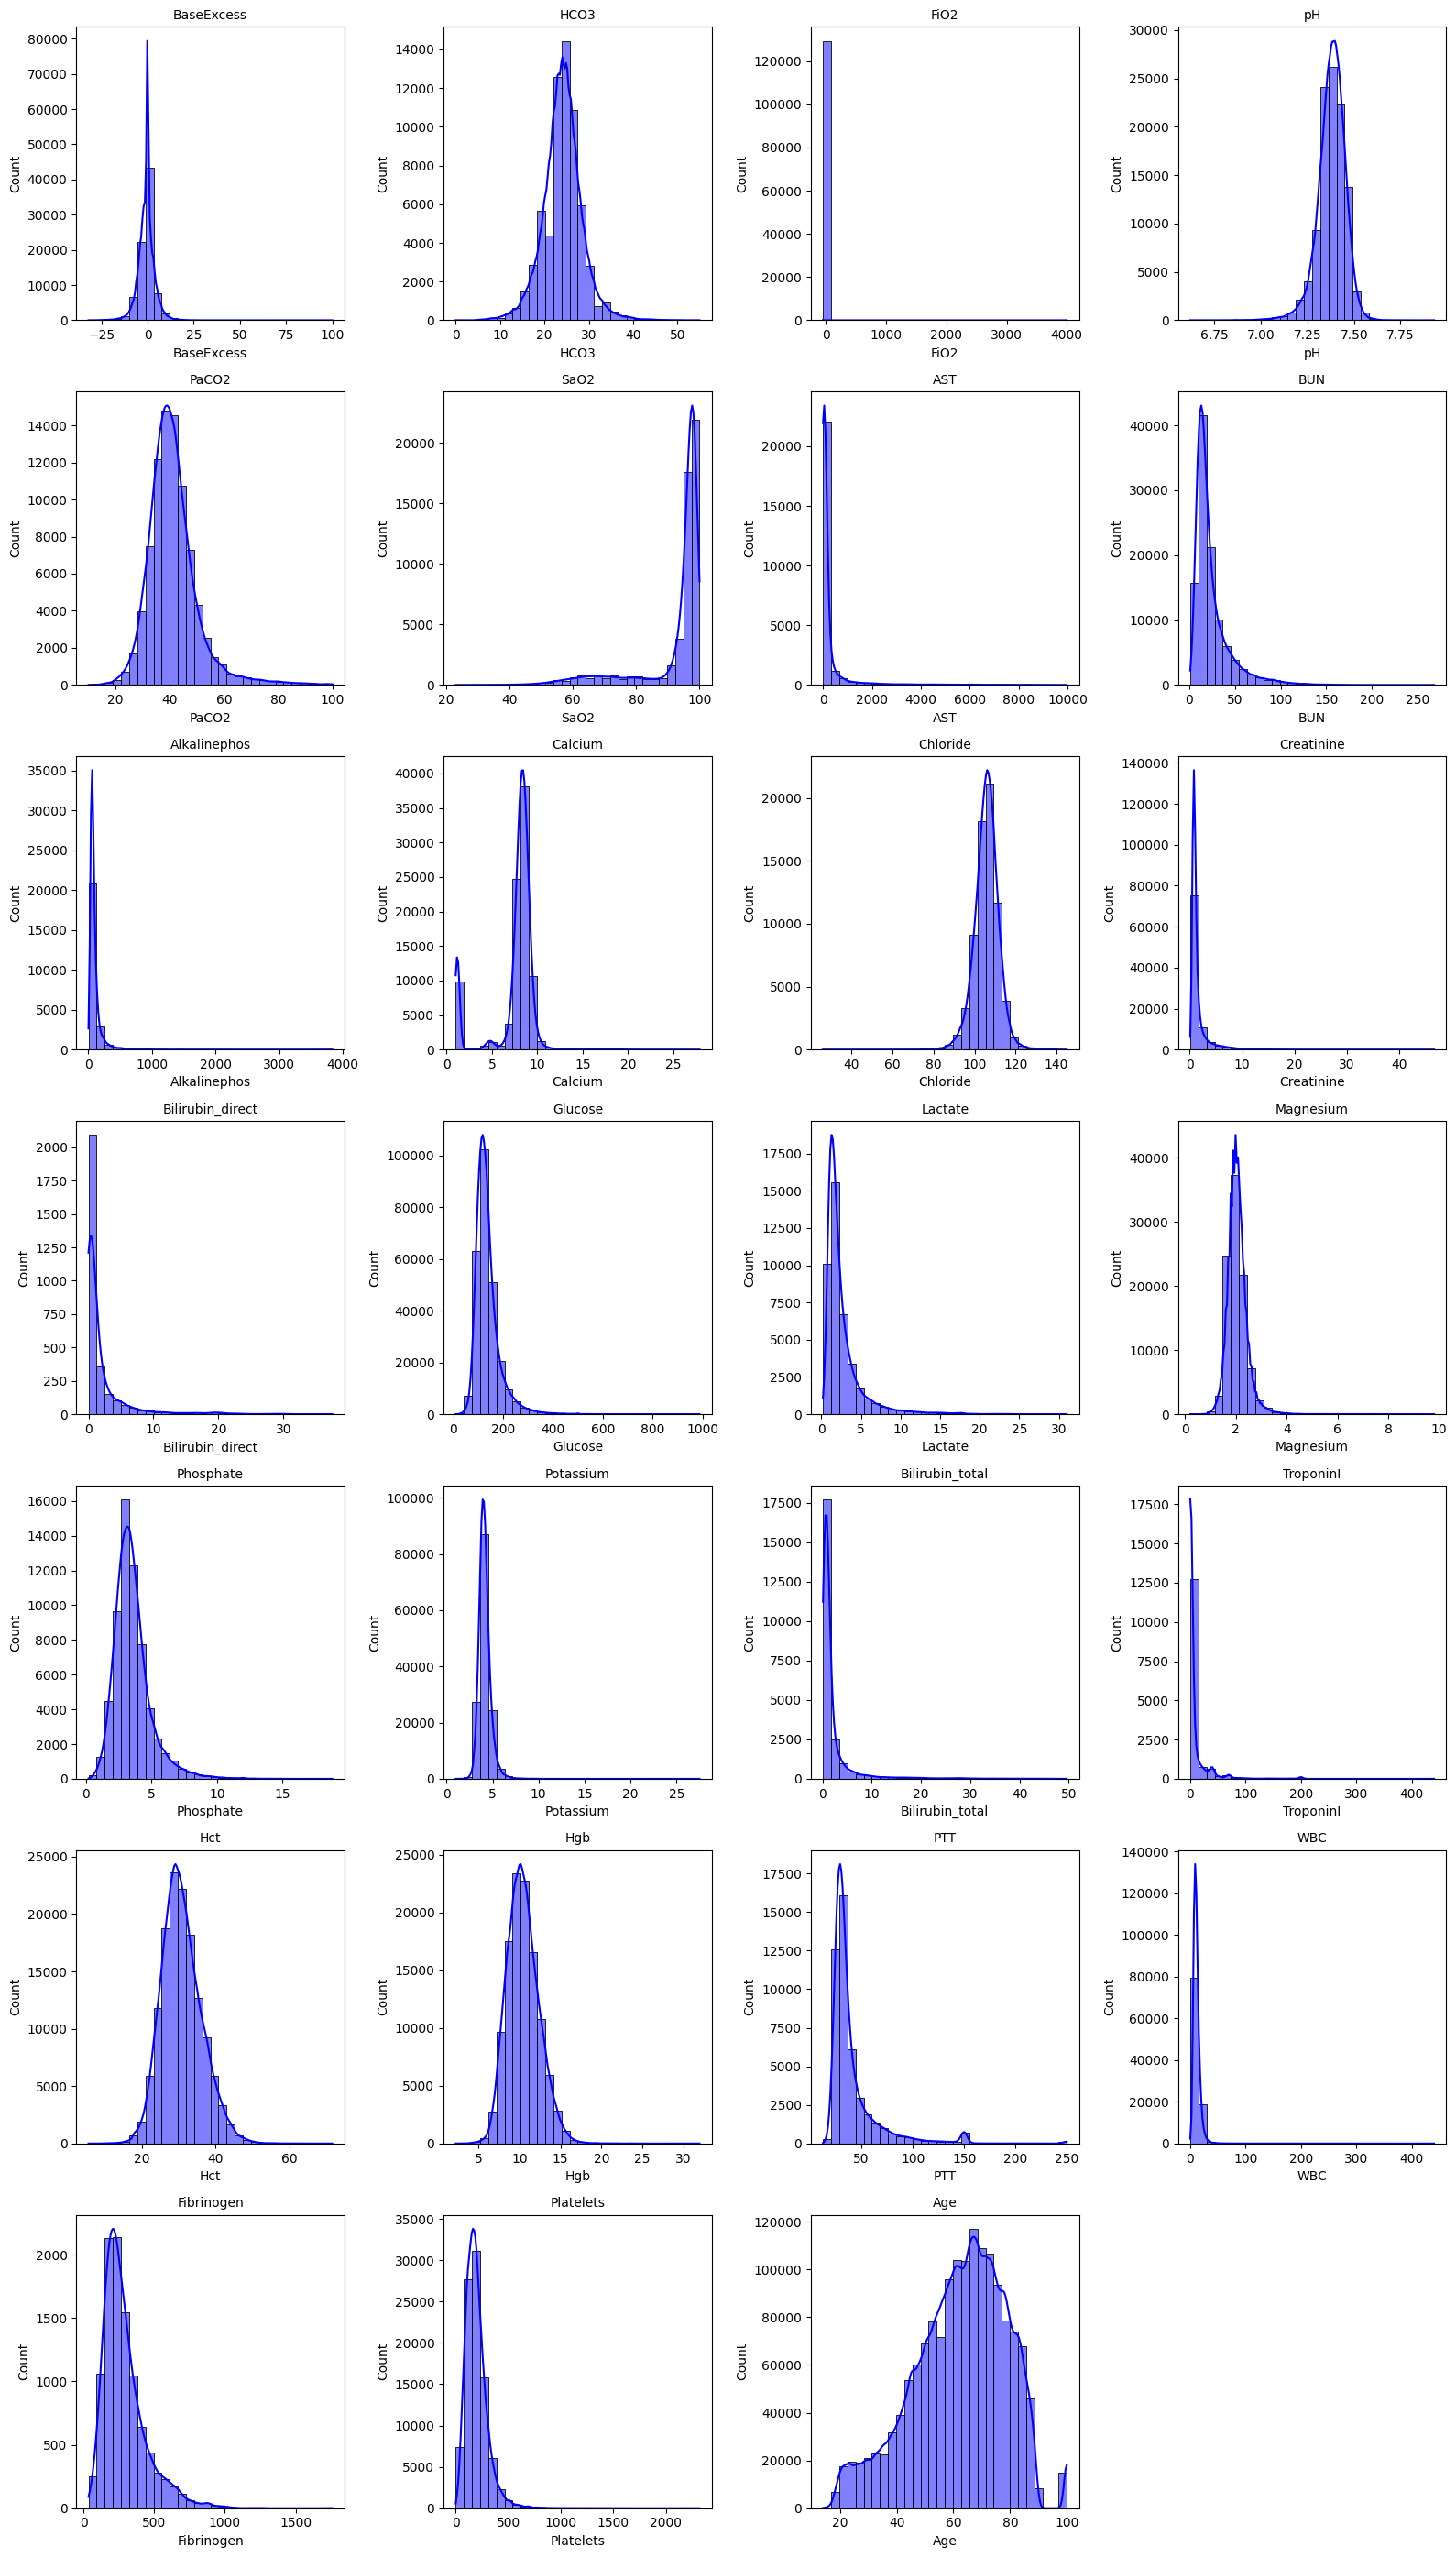

In [ ]:

# Assuming `data` is your DataFrame containing the relevant columns
columns_to_plot = [
     'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
    'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
    'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
    'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
    'Fibrinogen', 'Platelets', 'Age','HospAdmTime  '
]

# Set up the grid for subplots
num_cols = 4  # Number of plots per row
num_rows = -(-len(columns_to_plot) // num_cols)  # Calculate rows required
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    if column in data.columns:  # Ensure column exists in the data
        sns.histplot(data[column], kde=True, ax=axes[i], color='blue', bins=30)
        axes[i].set_title(column, fontsize=10)
    else:
        axes[i].axis('off')  # Turn off axis for empty plots

# Turn off unused axes
for i in range(len(columns_to_plot), len(axes)):
    axes[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Define a function for distribution-aware imputation
def impute_column(column):
    if column.isnull().all():
        return column  # Skip completely missing columns

    if column.nunique() == 1:
        # If the column has only one unique value, fill with that value
        return column.fillna(column.mode()[0])

    if column.skew() > 1 or column.skew() < -1:
        # Skewed distribution: use median
        return column.fillna(column.median())
    elif column.isnull().sum() > 0.4 * len(column):
        # Missing > 40%: sample from existing values
        return column.apply(lambda x: np.random.choice(column.dropna()) if pd.isnull(x) else x)
    else:
        # Normal or less skewed: use mean
        return column.fillna(column.mean())


In [ ]:
# List of columns to impute
columns_to_impute = [
    'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
    'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
    'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
    'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
    'Fibrinogen', 'Platelets', 'Age','HospAdmTime']

In [ ]:
# Optimized Imputation Function
import numpy as np

def impute_column_vectorized(column):
    # Check if the column contains numeric data
    if column.dtype in [np.float64, np.int64]:
        # Calculate the mean or median (you can switch this)
        imputed_value = column.median() if column.median() > 0 else column.mean()
        return column.fillna(imputed_value)
    else:
        # Handle non-numeric data (optional, if needed)
        return column.fillna(column.mode()[0])

# Apply vectorized imputation
for col in columns_to_impute:
    data[col] = impute_column_vectorized(data[col])


In [ ]:
# Verify post-imputation
missing_post_imputation = data[columns_to_impute].isnull().sum()
print("Missing values after imputation:\n", missing_post_imputation)

Missing values after imputation:
 EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
HospAdmTime         0
dtype: int64


In [ ]:
# Mode Imputation for categorical columns
# Replace NaNs in categorical columns like 'Gender', 'Unit1', 'Unit2' with mode
categorical_cols = ['Gender', 'Unit1', 'Unit2']  # Replace with your actual categorical columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-23-666d365dc629>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
# Check for any remaining missing values
print("Missing values after filling with mean:\n", data.isnull().sum())

Missing values after filling with mean:
 HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
dtype: int64


In [ ]:
data.shape

(1552210, 41)

In [ ]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,97.0,95.0,36.11,98.0,75.33,43.0,19.0,33.0,-0.689919,24.0,...,10.3,250.0,181.0,83.14,0,0.0,1.0,-0.03,1,0
1,97.0,95.0,36.11,98.0,75.33,43.0,19.0,33.0,-0.689919,24.0,...,10.3,250.0,181.0,83.14,0,0.0,1.0,-0.03,2,0
2,89.0,99.0,36.11,122.0,86.00,43.0,22.0,33.0,-0.689919,24.0,...,10.3,250.0,181.0,83.14,0,0.0,1.0,-0.03,3,0
3,90.0,95.0,36.11,122.0,86.00,43.0,30.0,33.0,24.000000,24.0,...,10.3,250.0,181.0,83.14,0,0.0,1.0,-0.03,4,0
4,103.0,88.5,36.11,122.0,91.33,43.0,24.5,33.0,-0.689919,24.0,...,10.3,250.0,181.0,83.14,0,0.0,1.0,-0.03,5,0


In [ ]:
data.duplicated().sum()

0

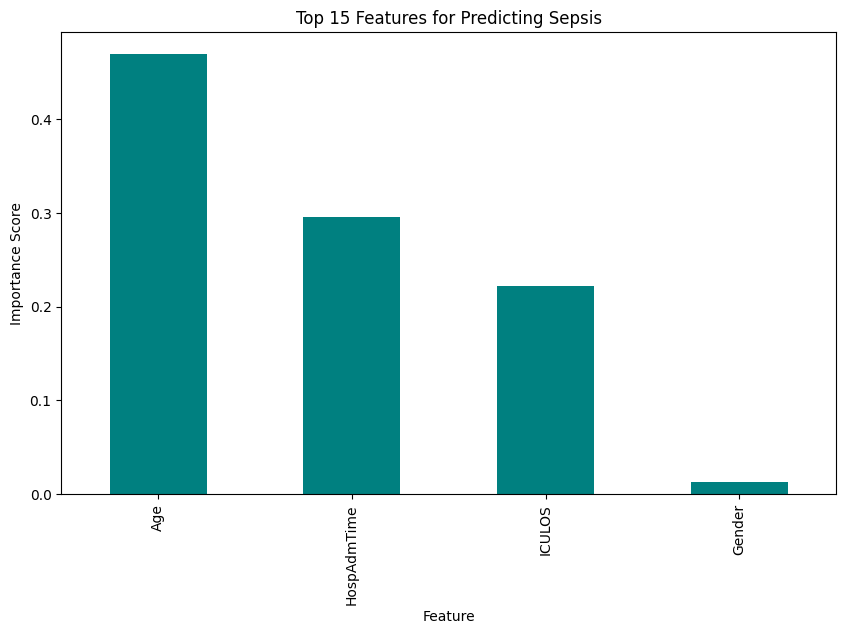

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# 8. Feature importance
X = data_revised.drop(columns=['SepsisLabel'], errors='ignore')
y = data_revised['SepsisLabel']
model = RandomForestClassifier(random_state=42)
model.fit(X.fillna(0), y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Features for Predicting Sepsis")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features based on ANOVA F-value
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X.fillna(0), y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("Selected features:", selected_features)

# Create a new DataFrame with only the selected features
X_selected = pd.DataFrame(X_new, columns=selected_features)

# Now X_selected contains only the top k features selected by the filter method
print(X_selected.head())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Selected features: Index(['Age', 'Gender', 'HospAdmTime', 'ICULOS'], dtype='object')
     Age  Gender  HospAdmTime  ICULOS
0  83.14     0.0        -0.03     1.0
1  83.14     0.0        -0.03     2.0
2  83.14     0.0        -0.03     3.0
3  83.14     0.0        -0.03     4.0
4  83.14     0.0        -0.03     5.0


pca -- dimentional reduction, elbow method, dip point put in pca, find x and y

In [ ]:
data_revised=data.copy()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = data_revised.drop(columns=['SepsisLabel'])  # Features
y = data_revised['SepsisLabel']  # Target

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

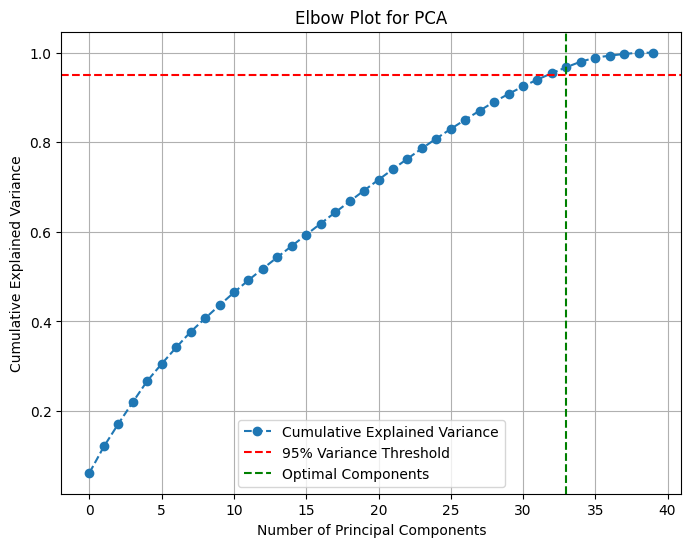

In [ ]:
# Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1, color='g', linestyle='--', label='Optimal Components')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Find the number of components for 95% variance
optimal_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"Optimal Number of Components: {optimal_components}")

Optimal Number of Components: 33


In [ ]:
# Get the reduced dataset
pca = PCA(n_components=optimal_components)
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
# Display the important features contributing to each principal component
pca_features = np.abs(pca.components_)
feature_importances = np.sum(pca_features, axis=0)
important_features = X.columns[np.argsort(feature_importances)[-optimal_components:]]
print(f"Important Features from PCA: {important_features}")

Important Features from PCA: Index(['BUN', 'SBP', 'BaseExcess', 'Phosphate', 'Creatinine', 'PaCO2', 'pH',
       'Bilirubin_total', 'HCO3', 'HR', 'Lactate', 'Chloride', 'Potassium',
       'TroponinI', 'Fibrinogen', 'SaO2', 'Resp', 'Gender', 'PTT', 'Calcium',
       'Bilirubin_direct', 'Platelets', 'Glucose', 'WBC', 'Magnesium', 'AST',
       'Age', 'O2Sat', 'Temp', 'HospAdmTime', 'EtCO2', 'ICULOS',
       'Alkalinephos'],
      dtype='object')


In [ ]:
# Define the columns to retain
columns_to_retain = ['BUN', 'SBP', 'BaseExcess', 'Phosphate', 'Creatinine', 'PaCO2', 'pH',
       'Bilirubin_total', 'HCO3', 'HR', 'Lactate', 'Chloride', 'Potassium',
       'TroponinI', 'Fibrinogen', 'SaO2', 'Resp', 'Gender', 'PTT', 'Calcium',
       'Bilirubin_direct', 'Platelets', 'Glucose', 'WBC', 'Magnesium', 'AST',
       'Age', 'O2Sat', 'Temp', 'HospAdmTime', 'EtCO2', 'ICULOS',
       'Alkalinephos', 'SepsisLabel']

# Check if all columns exist
missing_cols = set(columns_to_retain) - set(data.columns)
if missing_cols:
    print(f"Warning: The following columns are not in the DataFrame: {missing_cols}")
    # Handle the missing columns appropriately, e.g. remove them from columns_to_retain
    columns_to_retain = list(set(columns_to_retain) - missing_cols)

# Create a new DataFrame with only the selected columns
data_revised = data[columns_to_retain]

# Now data_revised contains only the specified columns
print(data_revised.head())

    BUN    SBP  BaseExcess  Phosphate  Creatinine  PaCO2    pH  \
0  17.0   98.0   -0.689919        3.3        0.94   40.0  7.38   
1  17.0   98.0   -0.689919        3.3        0.94   40.0  7.38   
2  17.0  122.0   -0.689919        3.3        0.94   40.0  7.38   
3  17.0  122.0   24.000000        3.3        0.94  100.0  7.36   
4  17.0  122.0   -0.689919        3.3        0.94   40.0  7.38   

   Bilirubin_total  HCO3     HR  ...  Magnesium   AST    Age  O2Sat   Temp  \
0              0.9  24.0   97.0  ...        2.0  41.0  83.14   95.0  36.11   
1              0.9  24.0   97.0  ...        2.0  41.0  83.14   95.0  36.11   
2              0.9  24.0   89.0  ...        2.0  41.0  83.14   99.0  36.11   
3              0.9  24.0   90.0  ...        2.0  41.0  83.14   95.0  36.11   
4              0.9  24.0  103.0  ...        2.0  41.0  83.14   88.5  36.11   

   HospAdmTime  EtCO2  ICULOS  Alkalinephos  SepsisLabel  
0        -0.03   33.0       1          74.0            0  
1        -0.03  

In [ ]:
# Save the DataFrame to a new CSV file
data_revised.to_csv('data_revised.csv', index=False)  # index=False prevents writing row indices

In [ ]:
data=pd.read_csv("/content/data_revised.csv")

In [ ]:

# Identify outliers using the Interquartile Range (IQR) method
for col in data.select_dtypes(include=[np.number]).columns:  # Numerical columns only
    Q1 = data[col].quantile(0.25)  # 25th percentile (lower quartile)
    Q3 = data[col].quantile(0.75)  # 75th percentile (upper quartile)
    IQR = Q3 - Q1                          # Interquartile range
    lower_bound = Q1 - 1.5 * IQR           # Lower bound
    upper_bound = Q3 + 1.5 * IQR           # Upper bound

    # Filter rows with outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers detected in column '{col}': {len(outliers)} rows")


Outliers detected in column 'BUN': 102374 rows
Outliers detected in column 'SBP': 18401 rows
Outliers detected in column 'BaseExcess': 84145 rows
Outliers detected in column 'Phosphate': 59949 rows
Outliers detected in column 'Creatinine': 94218 rows
Outliers detected in column 'PaCO2': 81539 rows
Outliers detected in column 'pH': 100775 rows
Outliers detected in column 'Bilirubin_total': 21875 rows
Outliers detected in column 'HCO3': 57918 rows
Outliers detected in column 'HR': 17756 rows
Outliers detected in column 'Lactate': 40407 rows
Outliers detected in column 'Chloride': 64812 rows
Outliers detected in column 'Potassium': 133959 rows
Outliers detected in column 'TroponinI': 14683 rows
Outliers detected in column 'Fibrinogen': 10201 rows
Outliers detected in column 'SaO2': 46454 rows
Outliers detected in column 'Resp': 60412 rows
Outliers detected in column 'PTT': 45481 rows
Outliers detected in column 'Calcium': 86428 rows
Outliers detected in column 'Bilirubin_direct': 2990 row

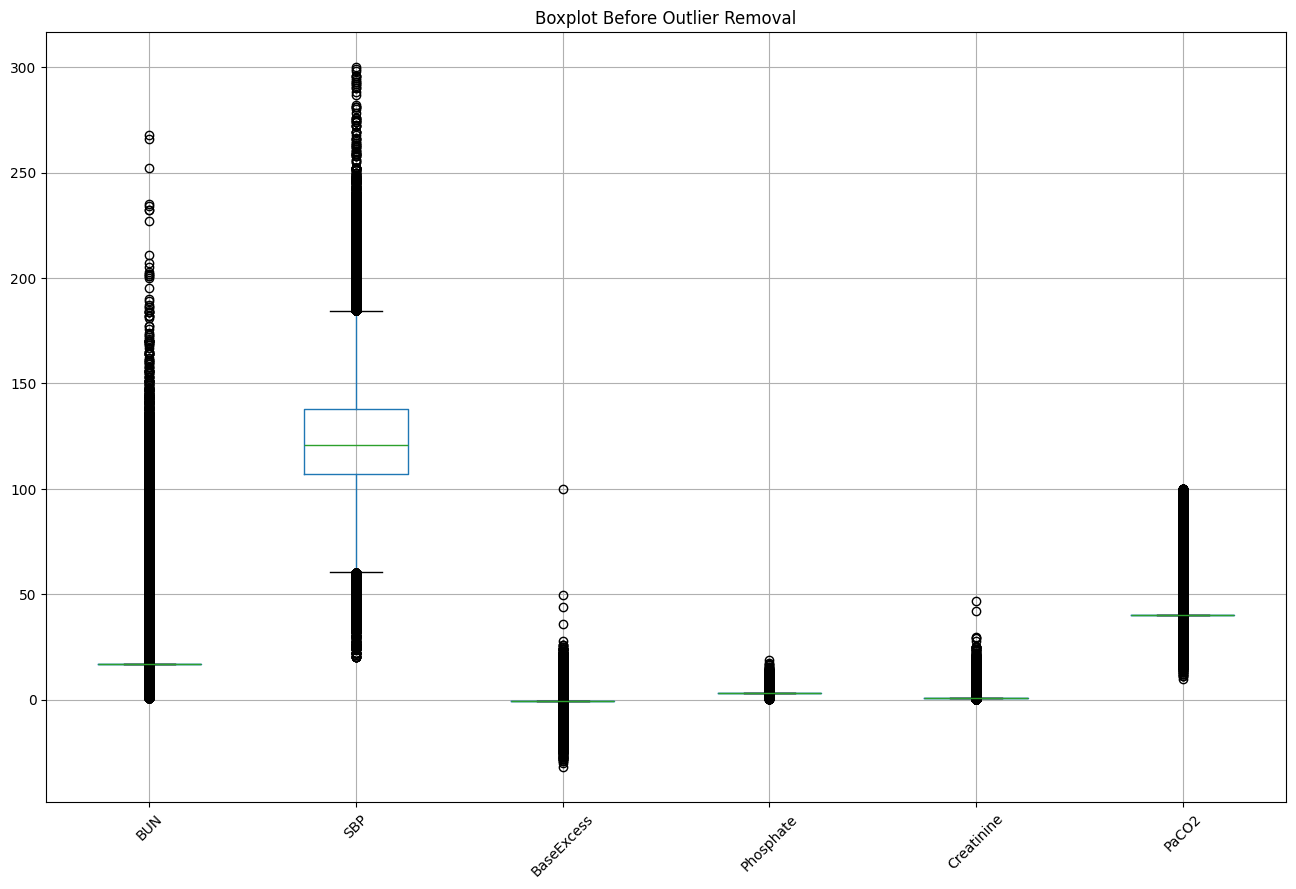

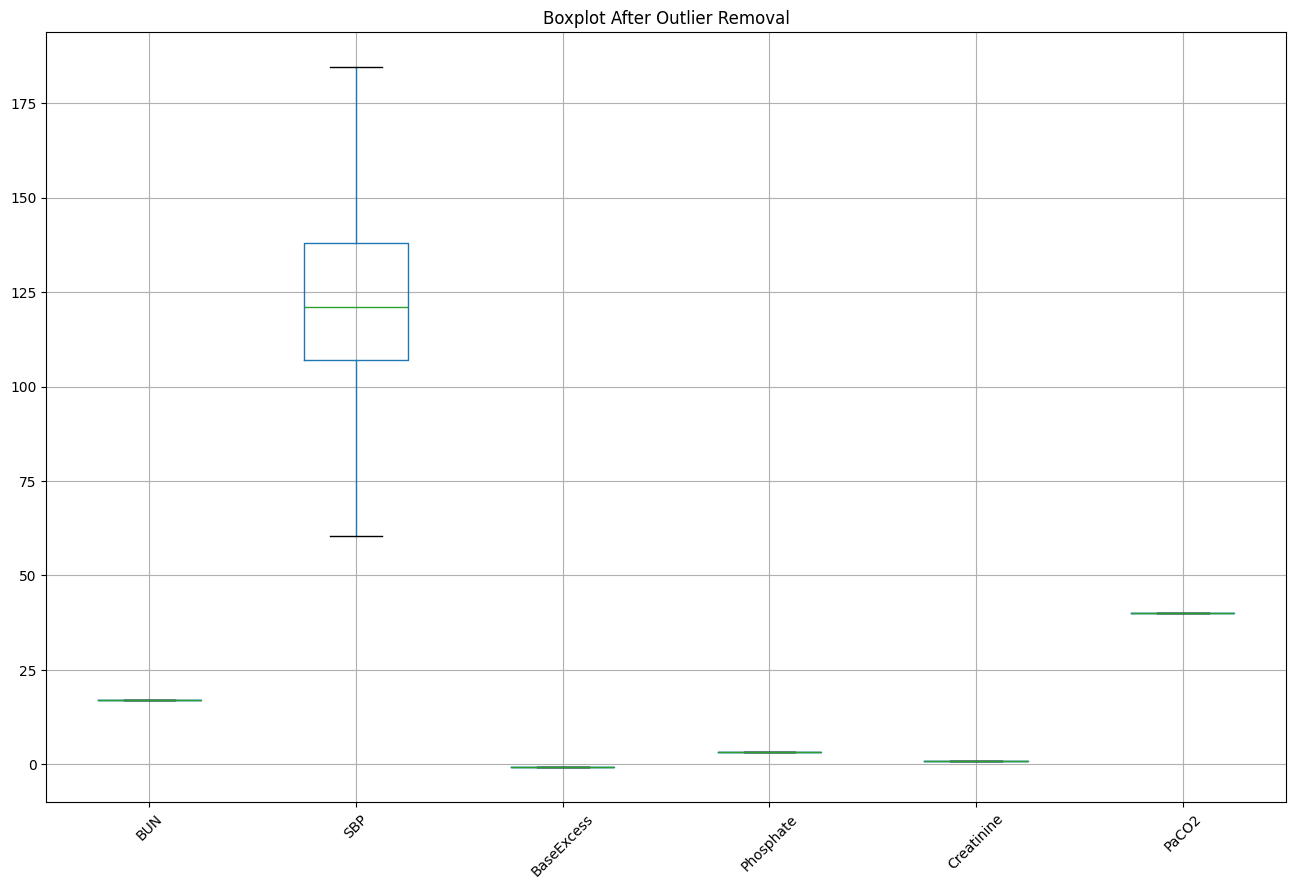

Outliers removed for each column:
BUN: 102374 rows removed
SBP: 17285 rows removed
BaseExcess: 64284 rows removed
Phosphate: 3044 rows removed
Creatinine: 1488 rows removed
PaCO2: 12296 rows removed
pH: 6127 rows removed
Bilirubin_total: 706 rows removed
HCO3: 421 rows removed
HR: 14860 rows removed
Lactate: 1479 rows removed
Chloride: 1288 rows removed
Potassium: 8395 rows removed
TroponinI: 6343 rows removed
Fibrinogen: 1979 rows removed
SaO2: 2926 rows removed
Resp: 60941 rows removed
PTT: 5730 rows removed
Calcium: 105 rows removed
Bilirubin_direct: 50 rows removed
Platelets: 5952 rows removed
Glucose: 114115 rows removed
WBC: 478 rows removed
Magnesium: 1103 rows removed
AST: 53 rows removed
Age: 238 rows removed
O2Sat: 29946 rows removed
Temp: 14617 rows removed
HospAdmTime: 153910 rows removed
EtCO2: 21534 rows removed
ICULOS: 32776 rows removed
Alkalinephos: 2 rows removed
Original dataset shape: (1552210, 34)
Cleaned dataset shape: (865365, 34)


In [ ]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)  # First quartile
        Q3 = data[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1                     # Interquartile range

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        outlier_counts[column] = outliers.sum()

        # Remove outliers
        data = data[~outliers]

    return data, outlier_counts

# Define the columns with outliers
outlier_columns = [
    'BUN', 'SBP', 'BaseExcess', 'Phosphate', 'Creatinine', 'PaCO2', 'pH',
    'Bilirubin_total', 'HCO3', 'HR', 'Lactate', 'Chloride', 'Potassium',
    'TroponinI', 'Fibrinogen', 'SaO2', 'Resp', 'PTT', 'Calcium',
    'Bilirubin_direct', 'Platelets', 'Glucose', 'WBC', 'Magnesium', 'AST',
    'Age', 'O2Sat', 'Temp', 'HospAdmTime', 'EtCO2', 'ICULOS', 'Alkalinephos'
]

# Visualize the dataset before removing outliers (boxplot for key columns)
plt.figure(figsize=(16, 10))
data[outlier_columns[:6]].boxplot()
plt.title('Boxplot Before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Remove outliers
data_cleaned, outlier_counts = remove_outliers_iqr(data, outlier_columns)

# Visualize the dataset after removing outliers
plt.figure(figsize=(16, 10))
data_cleaned[outlier_columns[:6]].boxplot()
plt.title('Boxplot After Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Display outlier counts
print("Outliers removed for each column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows removed")

# Check the size of the dataset before and after
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")


In [ ]:
# prompt: save this cleaned dataset into a new csv file

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_data.csv', index=False)

In [ ]:
data_revised=pd.read_csv("/content/cleaned_data.csv")

Visualization

In [ ]:
# Drop unnecessary columns
drop_columns = ['PatientID', 'RecordID']  # Add any other non-numeric or irrelevant columns
data_revised = data.drop(columns=drop_columns, errors='ignore')

In [ ]:
# Define septic and non-septic subsets
septic_patients = data_revised[data_revised['SepsisLabel'] == 1]
non_septic_patients = data_revised[data_revised['SepsisLabel'] == 0]

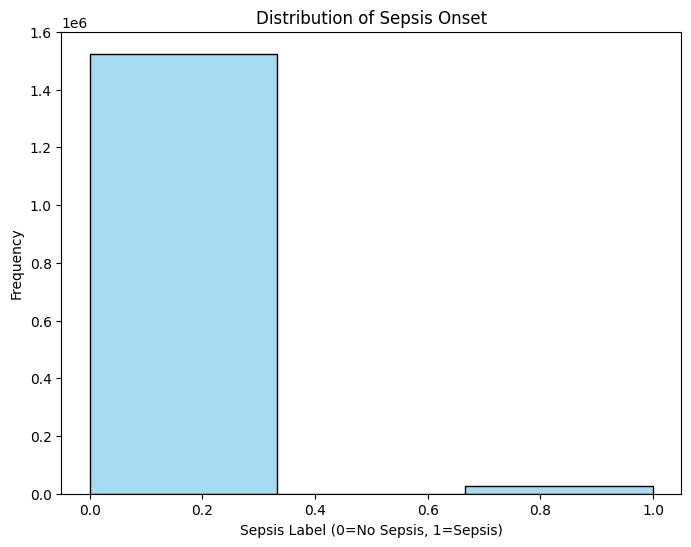

In [ ]:
# 1. Distribution of sepsis onset times
plt.figure(figsize=(8, 6))
sns.histplot(data_revised['SepsisLabel'], kde=False, bins=3, color='skyblue')
plt.title("Distribution of Sepsis Onset")
plt.xlabel("Sepsis Label (0=No Sepsis, 1=Sepsis)")
plt.ylabel("Frequency")
plt.show()

Interpretation:

A large majority of patients do not develop sepsis, as seen in the significant height difference between the bars.

The data is heavily skewed towards non-septic cases, which could influence model training and predictions if used for machine learning.

In [ ]:
data.columns

Index(['BUN', 'SBP', 'BaseExcess', 'Phosphate', 'Creatinine', 'PaCO2', 'pH',
       'Bilirubin_total', 'HCO3', 'HR', 'Lactate', 'Chloride', 'Potassium',
       'TroponinI', 'Fibrinogen', 'SaO2', 'Resp', 'Gender', 'PTT', 'Calcium',
       'Bilirubin_direct', 'Platelets', 'Glucose', 'WBC', 'Magnesium', 'AST',
       'Age', 'O2Sat', 'Temp', 'HospAdmTime', 'EtCO2', 'ICULOS',
       'Alkalinephos', 'SepsisLabel'],
      dtype='object')

<ipython-input-49-6f1776ba911e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_revised, x='SepsisLabel', y=col, palette="muted")
<ipython-input-49-6f1776ba911e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_revised, x='SepsisLabel', y=col, palette="muted")
<ipython-input-49-6f1776ba911e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_revised, x='SepsisLabel', y=col, palette="muted")
<ipython-input-49-6f1776ba911e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

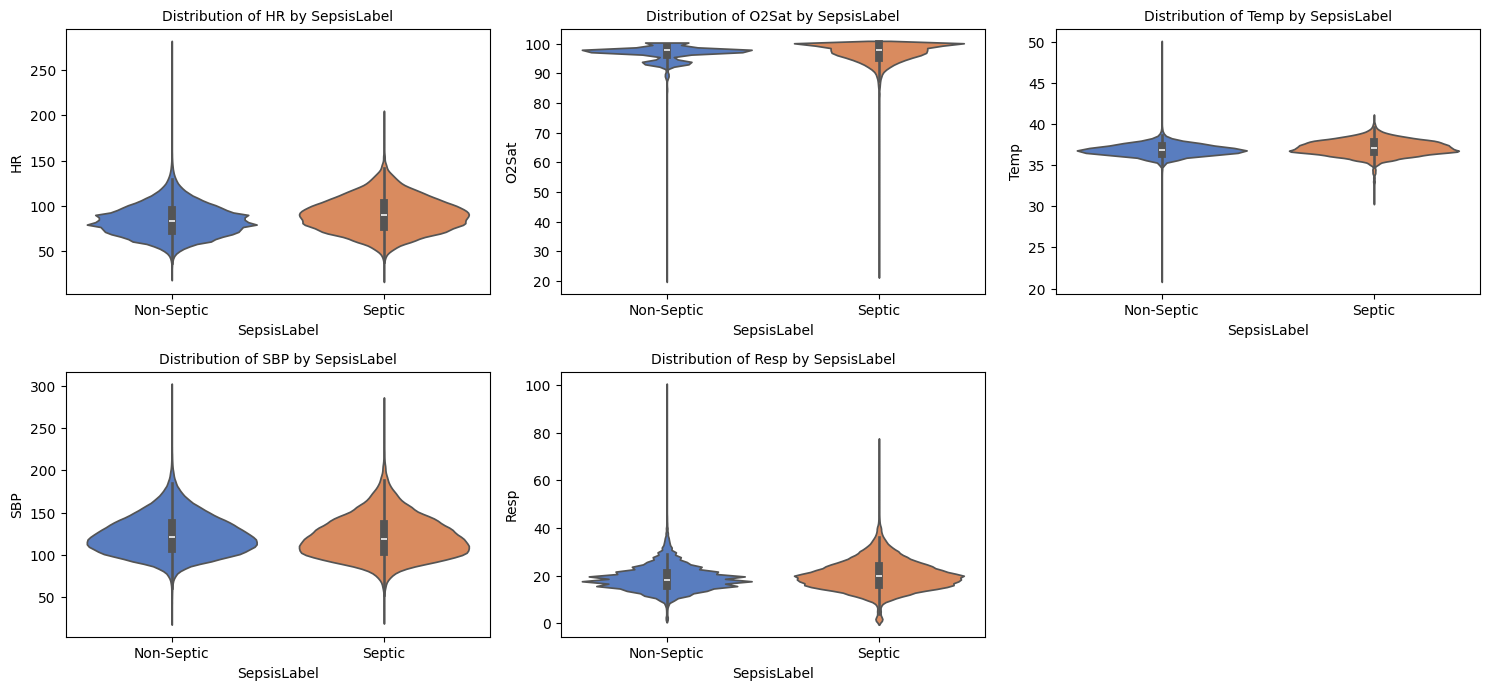

In [ ]:
# 2.Visualize variations in vital signs using violin plots
vital_signs = ['HR', 'O2Sat', 'Temp', 'SBP', 'Resp']
plt.figure(figsize=(15, 10))
for i, col in enumerate(vital_signs, 1):
    plt.subplot(3, 3, i)  # Adjust grid size as needed
    sns.violinplot(data=data_revised, x='SepsisLabel', y=col, palette="muted")
    plt.title(f"Distribution of {col} by SepsisLabel", fontsize=10)
    plt.xticks(ticks=[0, 1], labels=['Non-Septic', 'Septic'])
    plt.xlabel('SepsisLabel')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


**Heart Rate (HR):**

Septic patients show slightly higher HR variance but similar medians compared to non-septic patients.

Outliers are visible in septic cases with very high HRs.


**Oxygen Saturation (O2Sat):**

Non-septic patients show a tighter distribution, while septic patients have more variability.

Septic patients tend to have slightly lower O2Sat values overall.

**Temperature (Temp):**

Non-septic patients have more consistent temperatures, while septic patients show greater spread and higher median values.

**Systolic Blood Pressure (SBP):**

Septic patients exhibit a slightly lower median SBP with more variability than non-septic patients.

Extreme outliers exist in both groups, but septic patients have more low SBP readings.

**Respiratory Rate (Resp):**

Septic patients have a higher median respiratory rate and greater variance, reflecting potential respiratory distress.

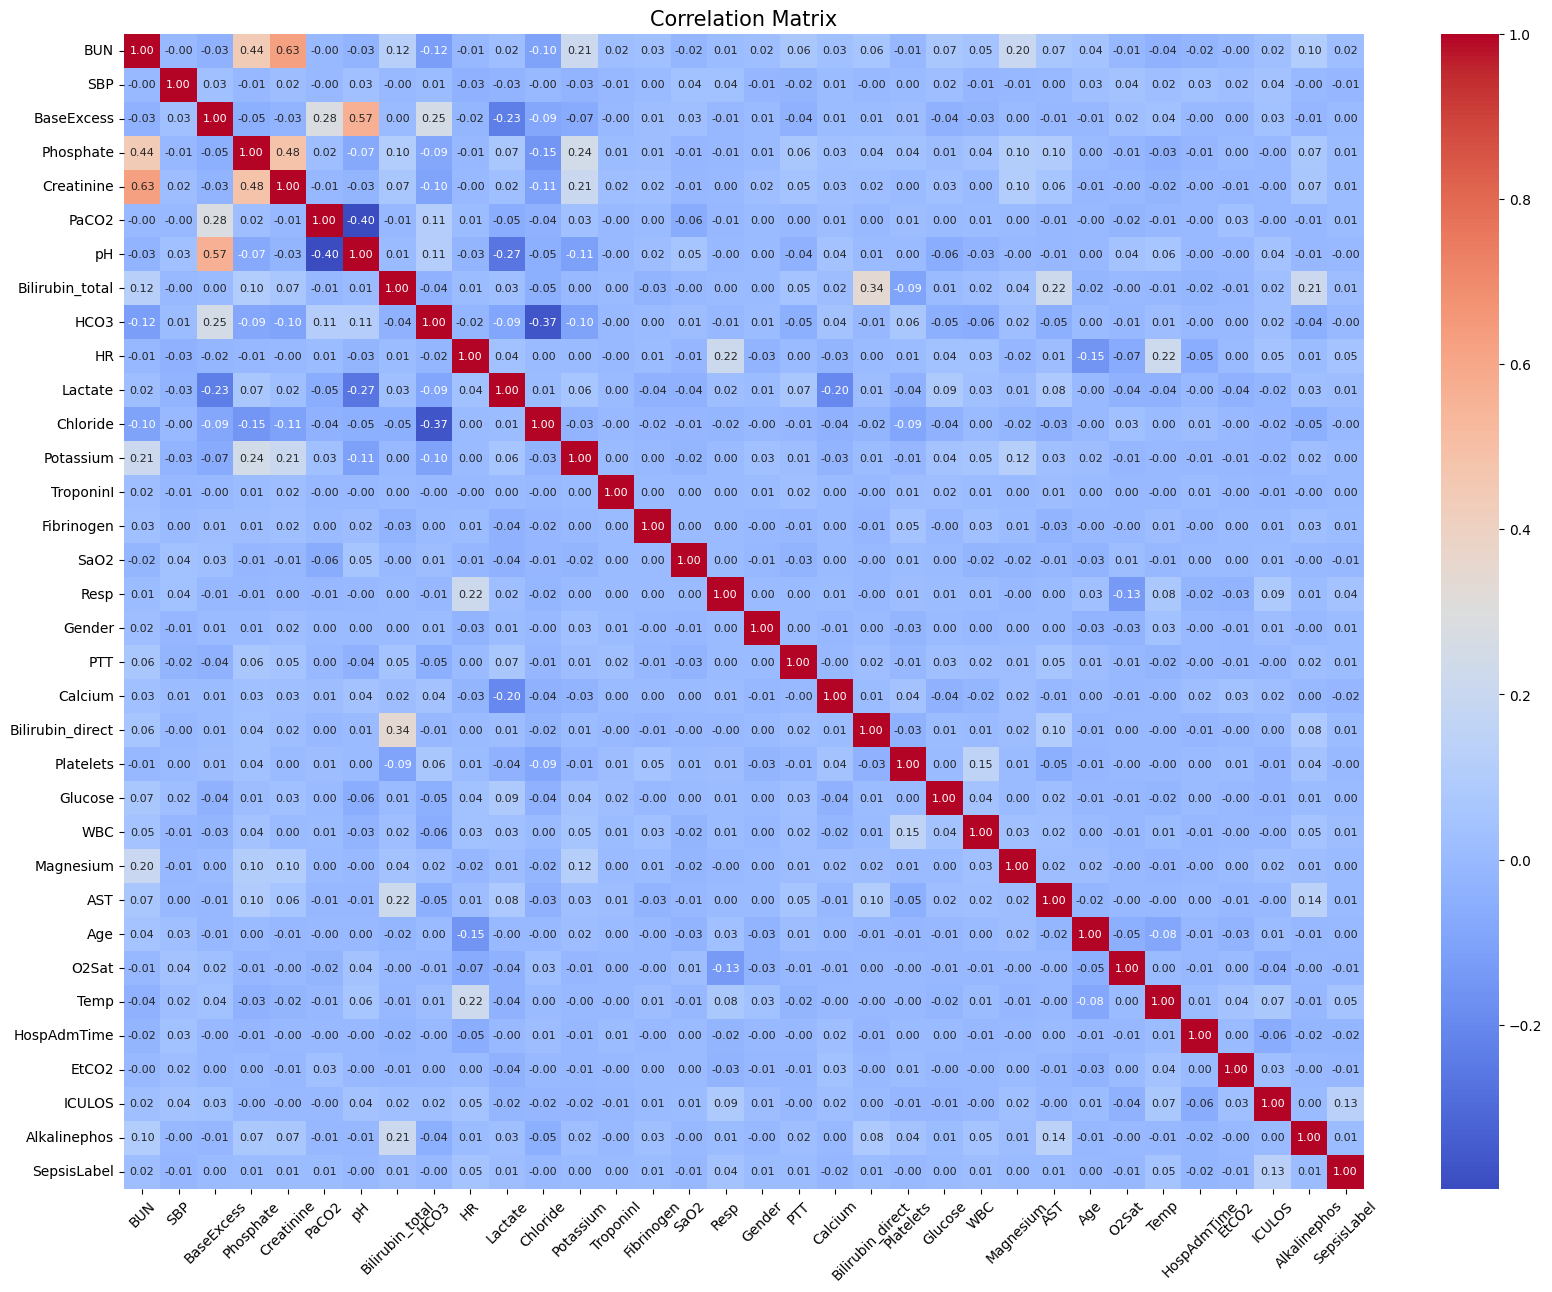

In [ ]:
#3. correlation matrix
correlation_matrix = data_revised.corr()
# Plot heatmap with improved annotations
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title("Correlation Matrix", fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()


<ipython-input-51-84b3f9bf61b5>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(septic_patients[col], label='Septic', shade=True)
<ipython-input-51-84b3f9bf61b5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_septic_patients[col], label='Non-Septic', shade=True)


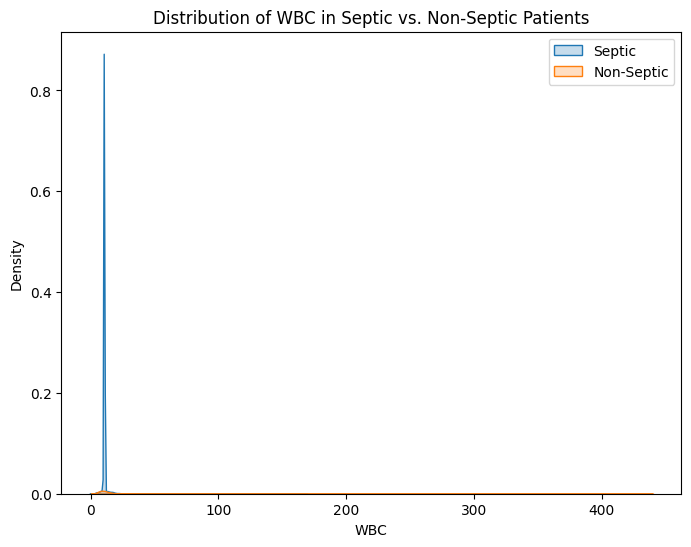

<ipython-input-51-84b3f9bf61b5>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(septic_patients[col], label='Septic', shade=True)
<ipython-input-51-84b3f9bf61b5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_septic_patients[col], label='Non-Septic', shade=True)


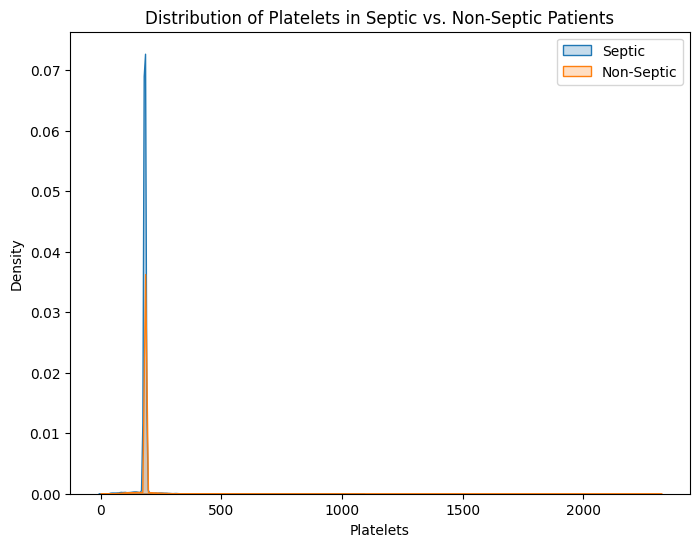

<ipython-input-51-84b3f9bf61b5>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(septic_patients[col], label='Septic', shade=True)
<ipython-input-51-84b3f9bf61b5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_septic_patients[col], label='Non-Septic', shade=True)


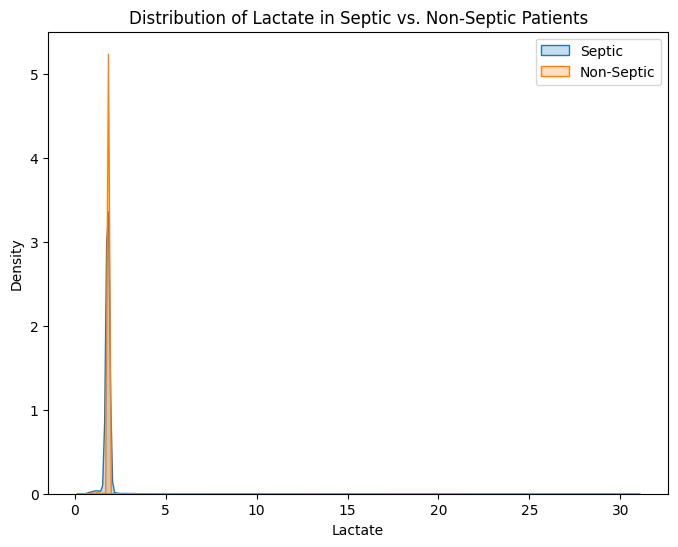

In [ ]:
# 4. Lab results comparison
lab_values = ['WBC','Platelets', 'Lactate']  # Replace with actual lab columns
for col in lab_values:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(septic_patients[col], label='Septic', shade=True)
    sns.kdeplot(non_septic_patients[col], label='Non-Septic', shade=True)
    plt.title(f"Distribution of {col} in Septic vs. Non-Septic Patients")
    plt.legend()
    plt.show()

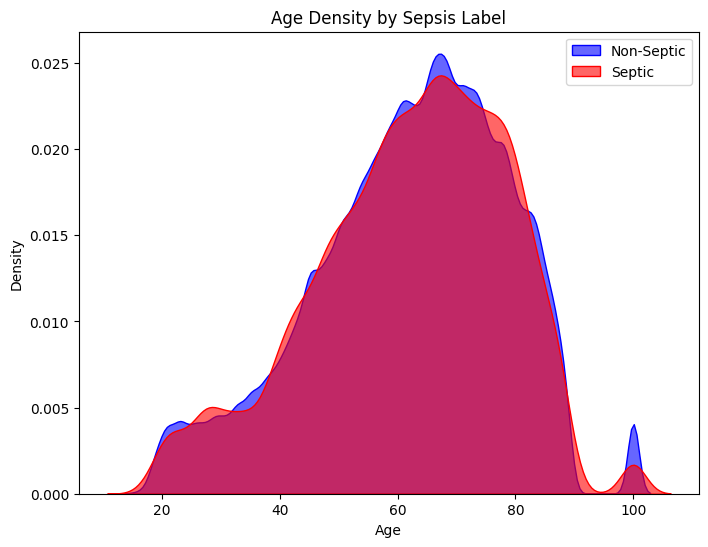

In [ ]:
# Density plot for Age distribution by SepsisLabel
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data_revised[data_revised['SepsisLabel'] == 0]['Age'], label='Non-Septic', fill=True, alpha=0.6, color='blue')
sns.kdeplot(data=data_revised[data_revised['SepsisLabel'] == 1]['Age'], label='Septic', fill=True, alpha=0.6, color='red')
plt.title("Age Density by Sepsis Label")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


<ipython-input-53-8274b7b7c8aa>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_revised, x=time_related_col, y=col, hue='SepsisLabel', ci=None, palette="muted")


<Figure size 1500x1000 with 0 Axes>

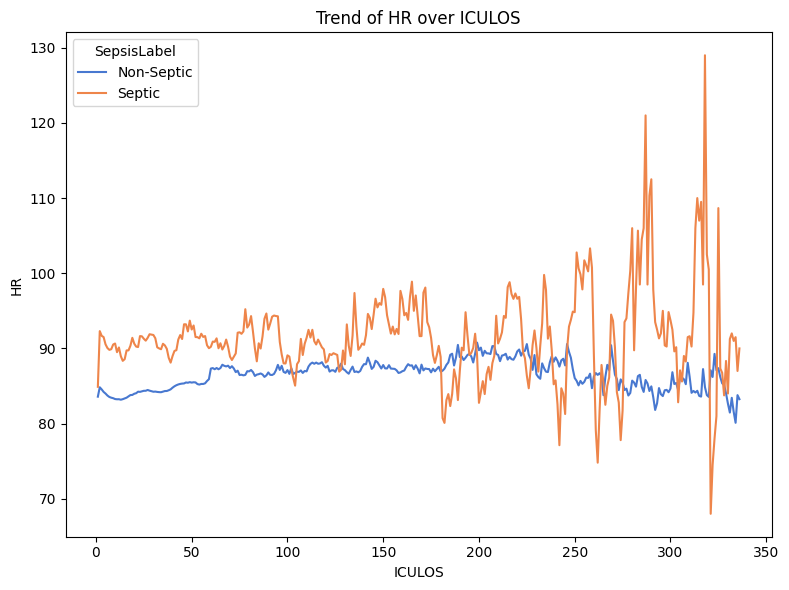

<ipython-input-53-8274b7b7c8aa>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_revised, x=time_related_col, y=col, hue='SepsisLabel', ci=None, palette="muted")


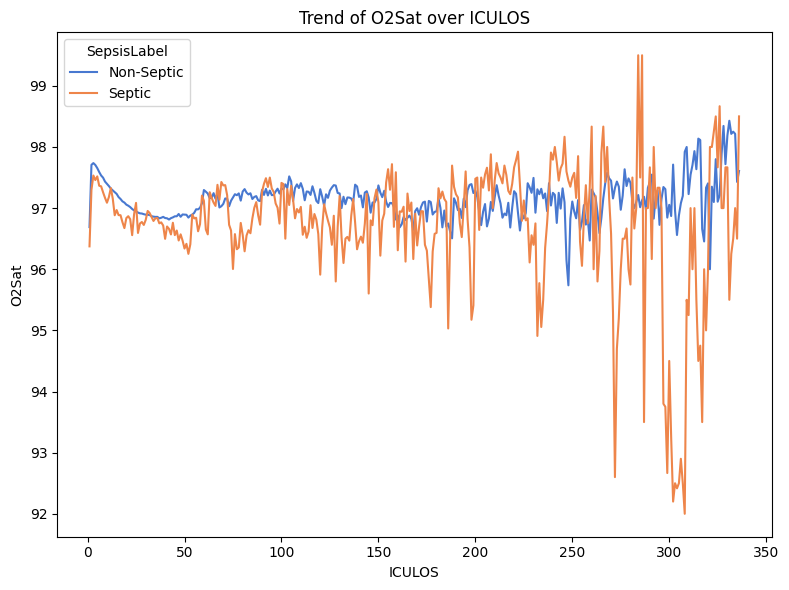

<ipython-input-53-8274b7b7c8aa>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_revised, x=time_related_col, y=col, hue='SepsisLabel', ci=None, palette="muted")


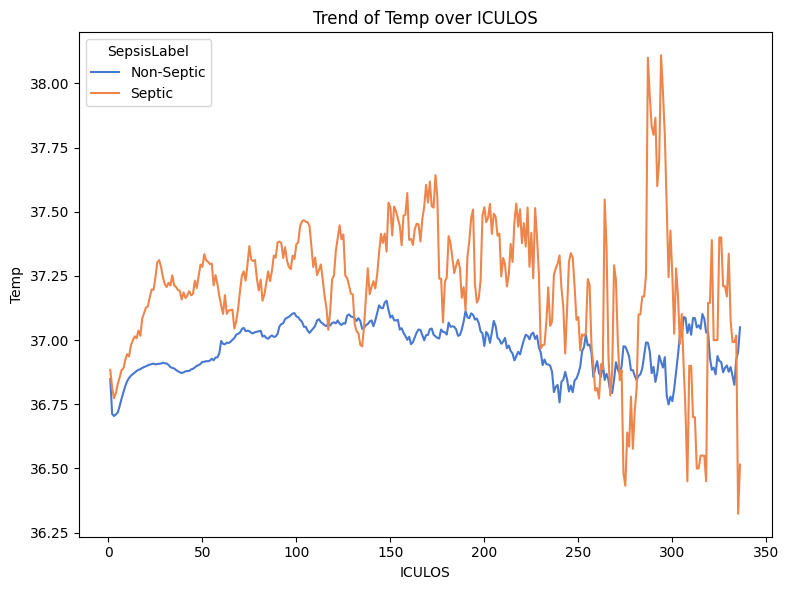

<ipython-input-53-8274b7b7c8aa>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_revised, x=time_related_col, y=col, hue='SepsisLabel', ci=None, palette="muted")


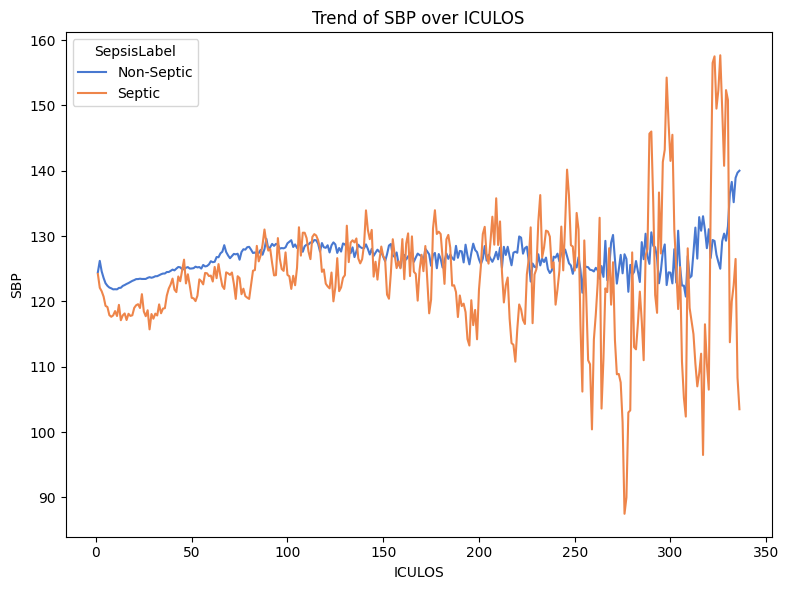

<ipython-input-53-8274b7b7c8aa>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_revised, x=time_related_col, y=col, hue='SepsisLabel', ci=None, palette="muted")


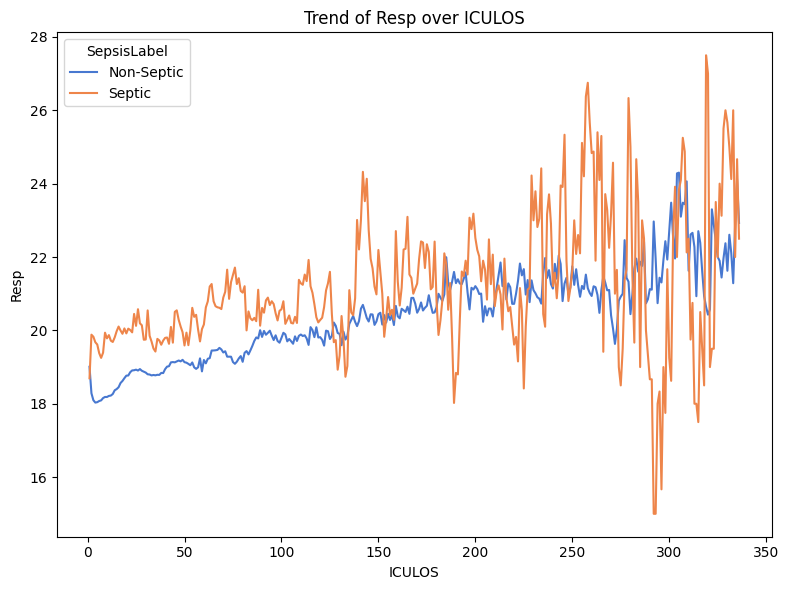

In [ ]:
#ICU length of stay
time_related_col = 'ICULOS'

# Visualize trends for vital signs over time
plt.figure(figsize=(15, 10))
for col in vital_signs:
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=data_revised, x=time_related_col, y=col, hue='SepsisLabel', ci=None, palette="muted")
    plt.title(f"Trend of {col} over {time_related_col}")
    plt.xlabel(time_related_col)
    plt.ylabel(col)
    plt.legend(title='SepsisLabel', labels=['Non-Septic', 'Septic'])
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

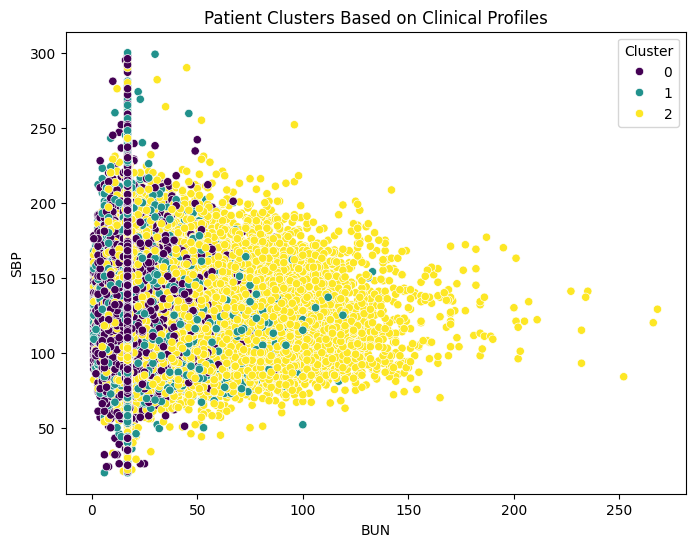

In [ ]:
# 7. Clustering
scaler = StandardScaler()

# Get numerical columns from data_revised
numeric_cols = data_revised.select_dtypes(include=['number']).columns

# Drop 'SepsisLabel' if it's in numeric_cols
numeric_cols = numeric_cols.drop('SepsisLabel', errors='ignore')

scaled_data = scaler.fit_transform(data_revised[numeric_cols]) # Apply scaling
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data_revised['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_revised[numeric_cols[0]], y=data_revised[numeric_cols[1]], hue=data_revised['Cluster'], palette='viridis')
plt.title("Patient Clusters Based on Clinical Profiles")
plt.show()

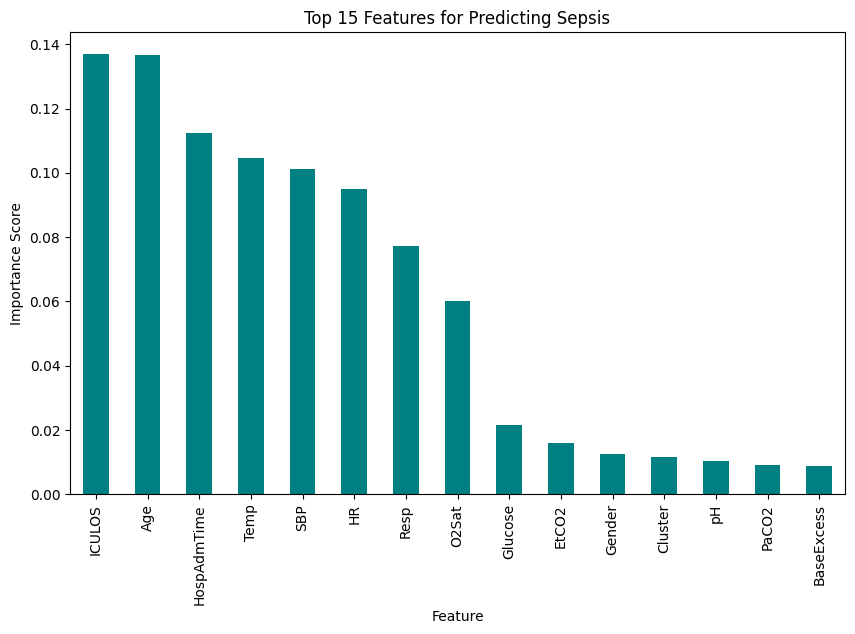

In [ ]:
# 8. Feature importance
X = data_revised.drop(columns=['SepsisLabel'], errors='ignore')
y = data_revised['SepsisLabel']
model = RandomForestClassifier(random_state=42)
model.fit(X.fillna(0), y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Features for Predicting Sepsis")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
x=data_revised[['ICULOS','Age','HospAdmTime','Temp','SBP','HR','DBP','MAP','Resp','O2Sat','Glucose','Gender','EtCO2','FiO2','pH']]
y=data_revised['SepsisLabel']


KeyError: "['DBP', 'MAP', 'FiO2'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = pd.DataFrame(x_train, columns=data_revised.columns)
x_test = pd.DataFrame(x_test, columns=data_revised.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert x_train and x_test back to DataFrames if they are NumPy arrays
# This allows you to use fillna
if isinstance(x_train, np.ndarray):
    x_train = pd.DataFrame(x_train, columns=data_revised.columns)
if isinstance(x_test, np.ndarray):
    x_test = pd.DataFrame(x_test, columns=data_revised.columns)


# Fill missing values in the dataframe
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)




# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)


    results.append([name, accuracy, precision, recall, f1, roc_auc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"])
results_df

In [ ]:
from sklearn.ensemble import VotingClassifier

# Assuming x_train, x_test, y_train, y_test, and the individual models (rf_model, xgb_model) are defined as in the previous code

# Create a Voting Classifier with hard voting
ensemble_model = VotingClassifier(estimators=[('rf', models["Random Forest"]), ('xgb', models["XGBoost"])], voting='hard')

# Train the ensemble model
ensemble_model.fit(x_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(x_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)
# Removed ROC AUC calculation for hard voting as predict_proba is not available

print(f"Ensemble Model (Hard Voting) - Accuracy: {ensemble_accuracy}")
print(f"Ensemble Model (Hard Voting) - Precision: {ensemble_precision}")
print(f"Ensemble Model (Hard Voting) - Recall: {ensemble_recall}")
print(f"Ensemble Model (Hard Voting) - F1-Score: {ensemble_f1}")
# print(f"Ensemble Model (Hard Voting) - ROC AUC: {ensemble_roc_auc}") # Removed this line

# You can also try soft voting by changing voting='soft' in VotingClassifier
# Create a Voting Classifier with soft voting
ensemble_model_soft = VotingClassifier(estimators=[('rf', models["Random Forest"]), ('xgb', models["XGBoost"])], voting='soft')

# Train the ensemble model
ensemble_model_soft.fit(x_train, y_train)

# Make predictions
ensemble_predictions_soft = ensemble_model_soft.predict(x_test)
ensemble_probabilities_soft = ensemble_model_soft.predict_proba(x_test)[:, 1]

# Evaluate the ensemble model
ensemble_accuracy_soft = accuracy_score(y_test, ensemble_predictions_soft)
ensemble_precision_soft = precision_score(y_test, ensemble_predictions_soft)
ensemble_recall_soft = recall_score(y_test, ensemble_predictions_soft)
ensemble_f1_soft = f1_score(y_test, ensemble_predictions_soft)
ensemble_roc_auc_soft = roc_auc_score(y_test, ensemble_probabilities_soft)

print(f"Ensemble Model (Soft Voting) - Accuracy: {ensemble_accuracy_soft}")
print(f"Ensemble Model (Soft Voting) - Precision: {ensemble_precision_soft}")
print(f"Ensemble Model (Soft Voting) - Recall: {ensemble_recall_soft}")
print(f"Ensemble Model (Soft Voting) - F1-Score: {ensemble_f1_soft}")
print(f"Ensemble Model (Soft Voting) - ROC AUC: {ensemble_roc_auc_soft}")